In [1]:
import os
import re

import numpy as np
import pandas as pd
import tables

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
taste_profile_df = pd.read_csv('/home/016709732/dataset/train_triplets.txt', sep='\t', header=None, names = ['user_id','song_id','play_count'], nrows = 2000000)
taste_profile_df.shape

(2000000, 3)

In [3]:
taste_profile_df.head(8)

,user_id,song_id,play_count
0,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAKIMP12A8C130995,1
1,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOAPDEY12A81C210A9,1
2,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBBMDR12A8C13253B,2
3,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFNSP12AF72A0E22,1
4,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBFOVM12A58A7D494,1
5,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBNZDC12A6D4FC103,1
6,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBSUJE12A6D4F8CF5,2
7,b80344d063b5ccb3212f76538f3d9e43d87dca9e,SOBVFZR12A6D4F8AE3,1


In [4]:
taste_profile_df.isnull().sum()

user_id       0
song_id       0
play_count    0
dtype: int64

In [5]:
taste_profile_df.duplicated().sum()

0

In [6]:
song_data_df = tables.open_file("/home/016709732/dataset/msd_summary_file.h5", mode="r")
song_data_table = song_data_df.root.metadata.songs
metadata_table_df = pd.DataFrame.from_records(song_data_table[:])
metadata_table_df.shape

(1000000, 20)

In [7]:
metadata_table_df.drop(columns =['analyzer_version', 'artist_7digitalid','artist_id', 'idx_artist_terms','idx_similar_artists','release_7digitalid','artist_longitude','artist_latitude','artist_playmeid','track_7digitalid','artist_mbid'],inplace=True)
metadata_table_df.replace({b'': np.nan}, inplace=True)

In [8]:
metadata_table_df = metadata_table_df.applymap(lambda x: x.decode('utf-8').strip('\'"') if isinstance(x, bytes) else x)
metadata_table_df.head(8)

,artist_familiarity,artist_hotttnesss,artist_location,artist_name,genre,release,song_hotttnesss,song_id,title
0,0.649822,0.394032,NaN,Faster Pussy cat,NaN,Monster Ballads X-Mas,0.542899,SOQMMHC12AB0180CB8,Silent Night
1,0.439604,0.356992,NaN,Karkkiautomaatti,NaN,Karkuteillä,0.299877,SOVFVAK12A8C1350D9,Tanssi vaan
2,0.643681,0.437504,"Glasgow, Scotland",Hudson Mohawke,NaN,Butter,0.617871,SOGTUKN12AB017F4F1,No One Could Ever
3,0.448501,0.372349,NaN,Yerba Brava,NaN,De Culo,NaN,SOBNYVR12A8C13558C,Si Vos Querés
4,0.000000,0.000000,NaN,Der Mystic,NaN,Rene Ablaze Presents Winter Sessions,NaN,SOHSBXH12A8C13B0DF,Tangle Of Aspens
5,0.361287,0.109626,NaN,David Montgomery,NaN,Berwald: Symphonies Nos. 1/2/3/4,NaN,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All..."
6,0.692923,0.453732,"Mexico City, Mexico",Sasha / Turbulence,NaN,Strictly The Best Vol. 34,NaN,SOQVRHI12A6D4FB2D7,We Have Got Love
7,0.588156,0.401092,NaN,Kris Kross,NaN,Da Bomb,NaN,SOEYRFT12AB018936C,2 Da Beat Ch'yall


In [9]:
track_metadata = pd.read_csv('/home/016709732/dataset/track_metadata.csv')
track_metadata.shape

(1000000, 14)

In [10]:
track_metadata.drop(columns =['track_id', 'title','release', 'artist_id','artist_mbid','artist_name','artist_familiarity','artist_hotttnesss', 'track_7digitalid','shs_perf','shs_work'], inplace=True)

In [11]:
track_metadata.drop_duplicates(inplace=True)
track_metadata.shape

(999658, 3)

In [12]:
song_data = pd.merge(metadata_table_df, track_metadata, on='song_id')
song_data.shape

(1001264, 11)

In [13]:
song_data.drop_duplicates(inplace=True)
song_data.shape

(1001224, 11)

In [14]:
taste_profile_df = taste_profile_df.drop(taste_profile_df[taste_profile_df.play_count > 25].index)

In [15]:
song_data = song_data.reset_index(drop=True)
song_data.head(8)

,artist_familiarity,artist_hotttnesss,artist_location,artist_name,genre,release,song_hotttnesss,song_id,title,duration,year
0,0.649822,0.394032,NaN,Faster Pussy cat,NaN,Monster Ballads X-Mas,0.542899,SOQMMHC12AB0180CB8,Silent Night,252.05506,2003
1,0.439604,0.356992,NaN,Karkkiautomaatti,NaN,Karkuteillä,0.299877,SOVFVAK12A8C1350D9,Tanssi vaan,156.55138,1995
2,0.643681,0.437504,"Glasgow, Scotland",Hudson Mohawke,NaN,Butter,0.617871,SOGTUKN12AB017F4F1,No One Could Ever,138.97098,2006
3,0.448501,0.372349,NaN,Yerba Brava,NaN,De Culo,NaN,SOBNYVR12A8C13558C,Si Vos Querés,145.05751,2003
4,0.000000,0.000000,NaN,Der Mystic,NaN,Rene Ablaze Presents Winter Sessions,NaN,SOHSBXH12A8C13B0DF,Tangle Of Aspens,514.29832,0
5,0.361287,0.109626,NaN,David Montgomery,NaN,Berwald: Symphonies Nos. 1/2/3/4,NaN,SOZVAPQ12A8C13B63C,"Symphony No. 1 G minor ""Sinfonie Serieuse""/All...",816.53506,0
6,0.692923,0.453732,"Mexico City, Mexico",Sasha / Turbulence,NaN,Strictly The Best Vol. 34,NaN,SOQVRHI12A6D4FB2D7,We Have Got Love,212.37506,0
7,0.588156,0.401092,NaN,Kris Kross,NaN,Da Bomb,NaN,SOEYRFT12AB018936C,2 Da Beat Ch'yall,221.20444,1993


In [16]:
print("Columns and the datatypes in the data: \n", song_data.dtypes)
print("\n\nSummary of column statistics: \n", song_data.describe())

Columns and the datatypes in the data: 
 artist_familiarity    float64
artist_hotttnesss     float64
artist_location        object
artist_name            object
genre                 float64
release                object
song_hotttnesss       float64
song_id                object
title                  object
duration              float64
year                    int64
dtype: object


Summary of column statistics: 
        artist_familiarity  artist_hotttnesss  genre  song_hotttnesss  \
count        1.001039e+06       1.001212e+06    0.0    582863.000000   
mean         5.575351e-01       3.801401e-01    NaN         0.356561   
std          1.388855e-01       1.263163e-01    NaN         0.234720   
min          0.000000e+00       0.000000e+00    NaN         0.000000   
25%          4.783631e-01       3.363909e-01    NaN         0.215080   
50%          5.591363e-01       3.863026e-01    NaN         0.377532   
75%          6.419072e-01       4.444072e-01    NaN         0.532483   
max  

In [17]:
print("Total number of unique artists: ", len(song_data['artist_name'].unique()))
print("Total number of unique releases/album names: ", len(song_data['release'].unique()))
print("Total number of unique song titles: ", len(song_data['title'].unique()))
print("Total number of unique songs: ", len(song_data['song_id'].unique()))

Total number of unique artists:  72658
Total number of unique releases/album names:  149275
Total number of unique song titles:  702192
Total number of unique songs:  999056


In [18]:
merged_data = pd.merge(song_data, taste_profile_df, on='song_id')

print("Top 10 active songs: ")
top_songs = merged_data.groupby(['title'])['play_count'].sum().sort_values(ascending=False)[:10]
top_songs = top_songs.reset_index(drop=False)
top_songs

Top 10 active songs: 


,title,play_count
0,Use Somebody,22052
1,Undo,16998
2,You're The One,16487
3,Yellow,15262
4,Sehr kosmisch,14624
5,Don't Stop The Music,13492
6,Dog Days Are Over (Radio Edit),12773
7,Nothin' On You [feat. Bruno Mars] (Album Version),12740
8,Revelry,12722
9,Bring Me To Life,12144


In [19]:
print("Top 10 active artists: ")
top_artists = merged_data.groupby(['artist_name'])['play_count'].sum().sort_values(ascending=False)[:10]
top_artists = top_artists.reset_index(drop=False)
top_artists

Top 10 active artists: 


,artist_name,play_count
0,Kings Of Leon,49797
1,Coldplay,48313
2,Muse,36516
3,Evanescence,30973
4,Eminem,30535
5,Florence + The Machine,28465
6,Jack Johnson,26716
7,The Black Keys,26039
8,Lily Allen,25037
9,Justin Bieber,23671


In [20]:
top_albums = song_data.groupby(['artist_name'])['song_hotttnesss'].mean().sort_values(ascending=False)[:10]
top_albums.to_frame()

,song_hotttnesss
artist_name,
Montell Jordan,1.0
Travie McCoy,1.0
Brontide,1.0
White Town,1.0
Timbaland / Katy Perry,1.0
Jerrod Niemann,1.0
Aníbal Troilo - Roberto Grela,1.0
Rihanna / Jay-Z,1.0
The Killers / Toni Halliday,1.0


Text(0, 0.5, 'Number of Users')

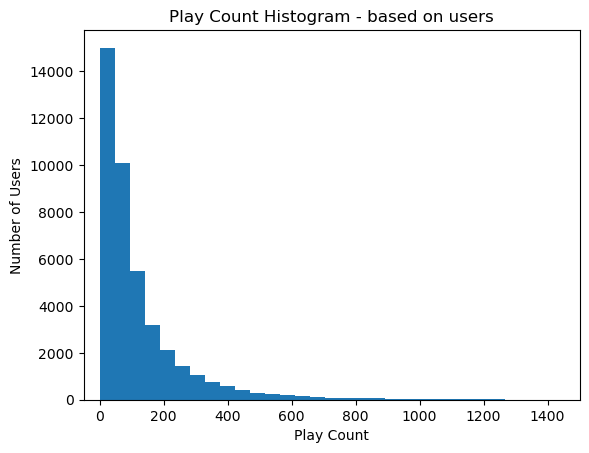

In [21]:
user_freq = merged_data.groupby('user_id')['play_count'].sum().reset_index()
user_freq['play_count'].hist(bins=100)
plt.grid(False)
plt.xlim(-50, 1500)
plt.title('Play Count Histogram - based on users')
plt.xlabel('Play Count')
plt.ylabel('Number of Users')

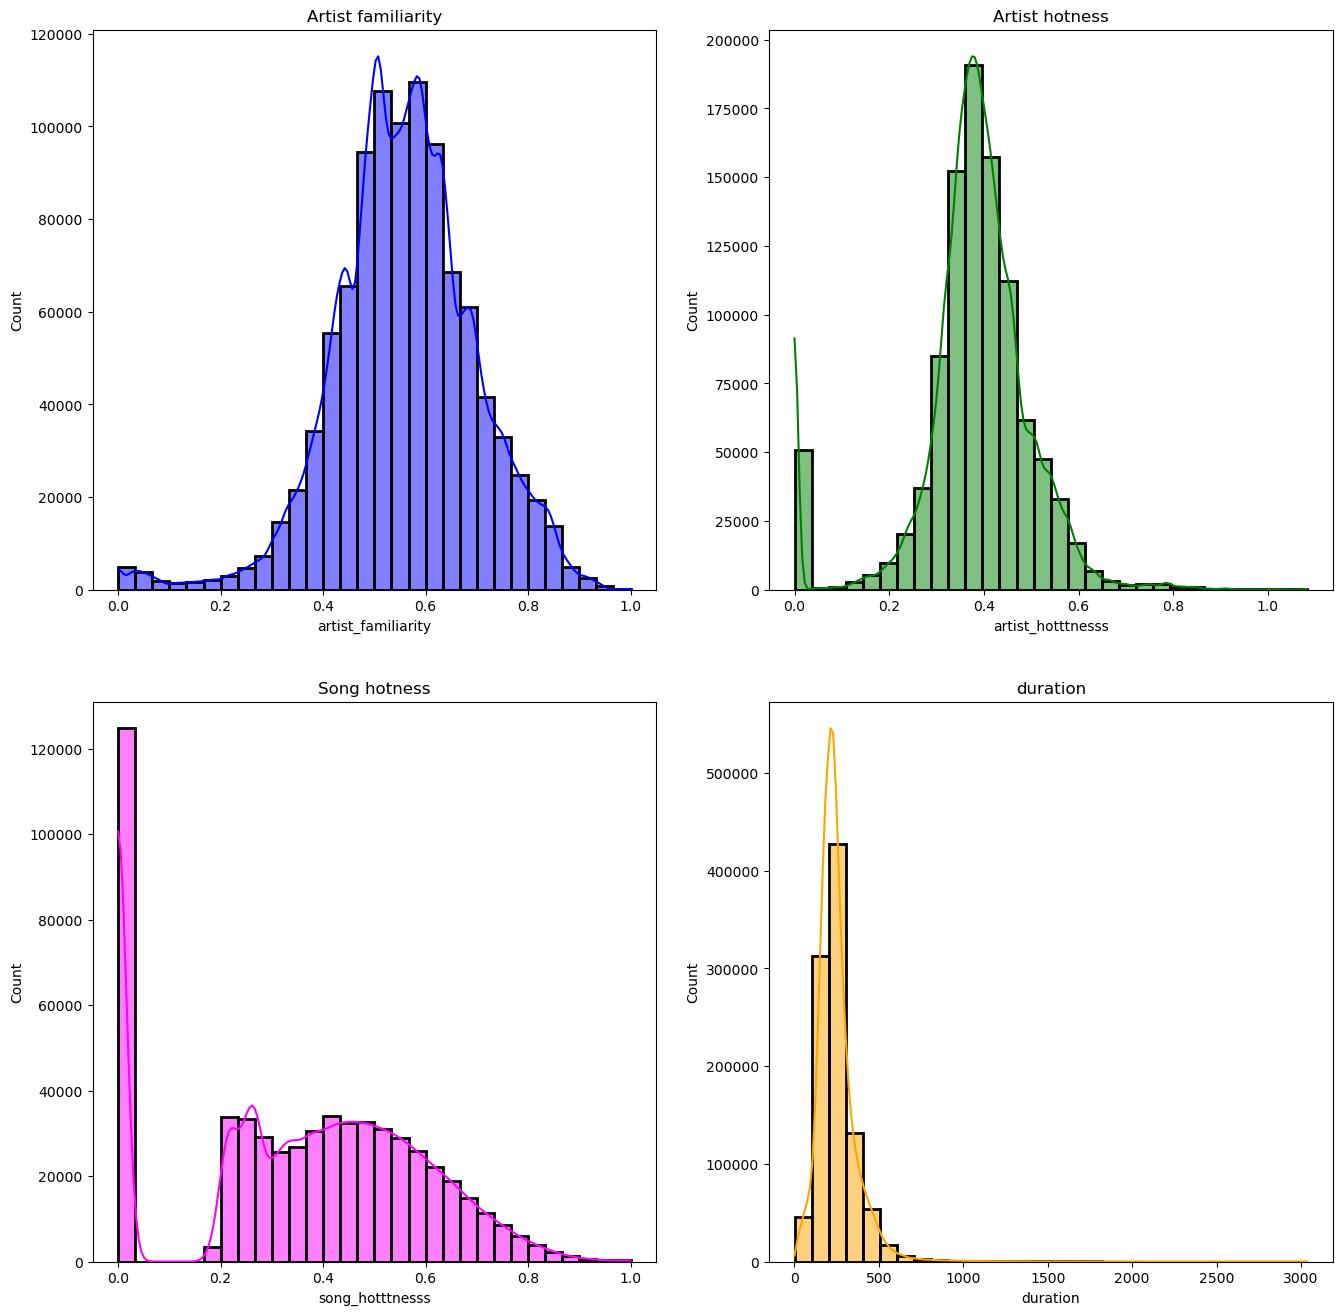

In [22]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 16))

sns.histplot(song_data['artist_familiarity'], kde=True, 
             bins=int(30), color = 'blue', 
             edgecolor='black',
             linewidth=2, ax=axs[0][0])
axs[0][0].set_title('Artist familiarity')

sns.histplot(song_data['artist_hotttnesss'], kde=True, 
             bins=int(30), color = 'green', 
             edgecolor='black',
             linewidth=2, ax=axs[0][1])
axs[0][1].set_title('Artist hotness')

sns.histplot(song_data['song_hotttnesss'], kde=True, 
             bins=int(30), color = 'magenta', 
             edgecolor='black',
             linewidth=2, ax=axs[1][0])
axs[1][0].set_title('Song hotness')

sns.histplot(song_data['duration'], kde=True, 
             bins=int(30), color = 'orange', 
             edgecolor='black',
             linewidth=2, ax=axs[1][1])
axs[1][1].set_title('duration')

plt.show()

Text(0.5, 1.0, 'play_count')

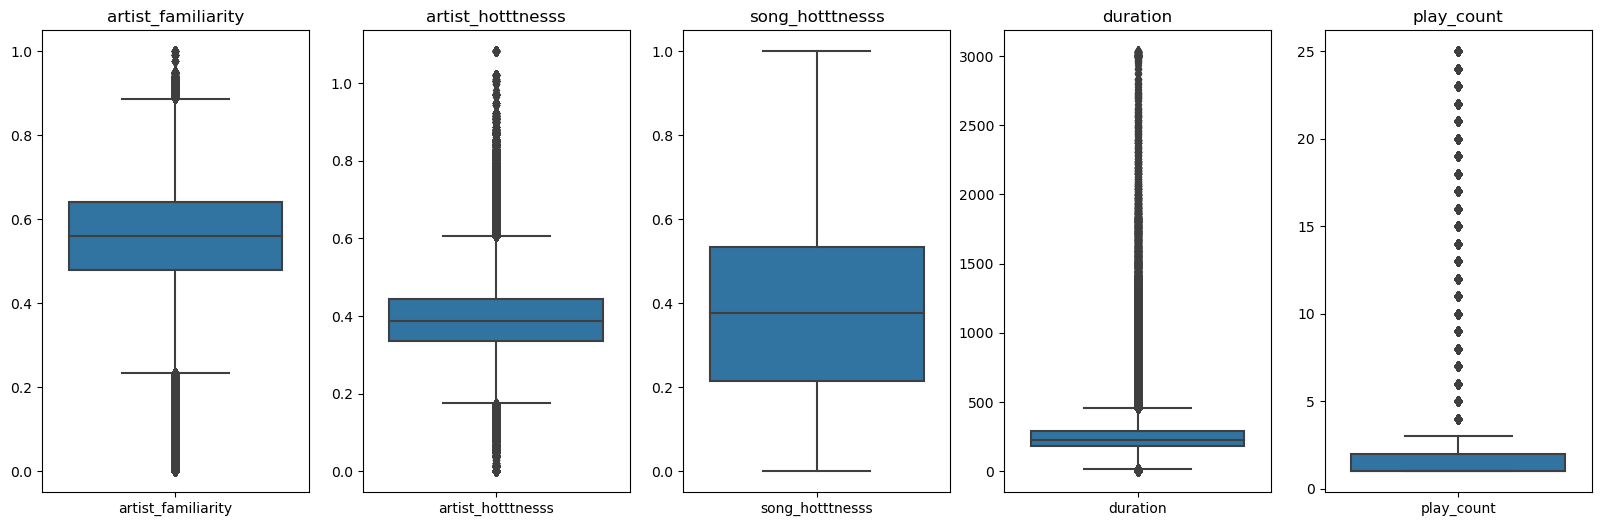

In [23]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20, 6))

sns.boxplot(data=song_data[['artist_familiarity']], ax=axs[0])
axs[0].set_title('artist_familiarity')

sns.boxplot(data=song_data[['artist_hotttnesss']], ax=axs[1])
axs[1].set_title('artist_hotttnesss')

sns.boxplot(data=song_data[['song_hotttnesss']], ax=axs[2])
axs[2].set_title('song_hotttnesss')

sns.boxplot(data=song_data[['duration']], ax=axs[3])
axs[3].set_title('duration')

sns.boxplot(data=taste_profile_df[['play_count']], ax=axs[4])
axs[4].set_title('play_count')

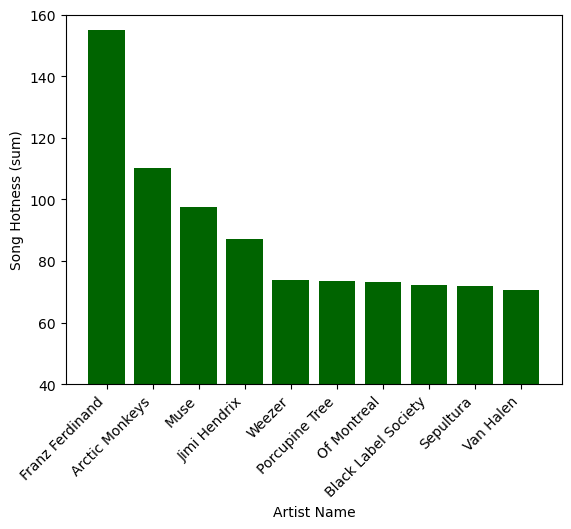

In [24]:
top_songs = song_data.groupby(['artist_name'])['song_hotttnesss'].sum().sort_values(ascending=False)[:10]
plt.ylim(40, 160)
plt.bar(top_songs.index, top_songs.values, color="darkgreen")
plt.xticks(rotation=45, ha='right')
plt.xlabel('Artist Name')
plt.ylabel('Song Hotness (sum)')
plt.show()

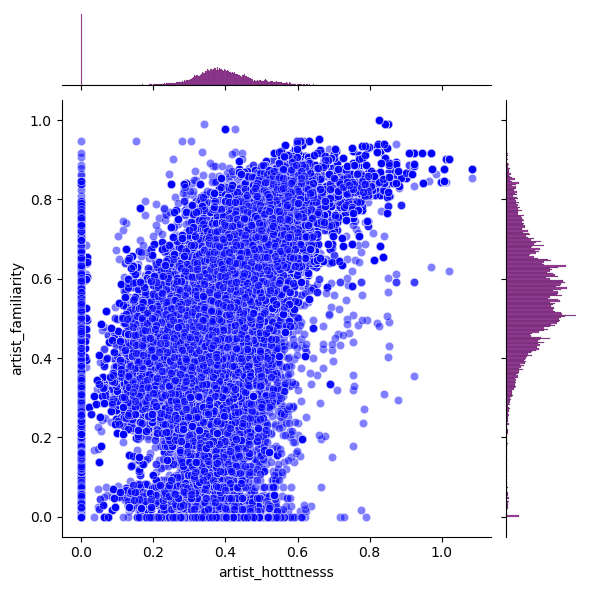

In [25]:
sns.jointplot(x = song_data['artist_hotttnesss'], y = song_data['artist_familiarity'], kind = 'scatter', alpha = 0.5, color = 'blue', marginal_kws = {'color': 'purple'})
plt.show()

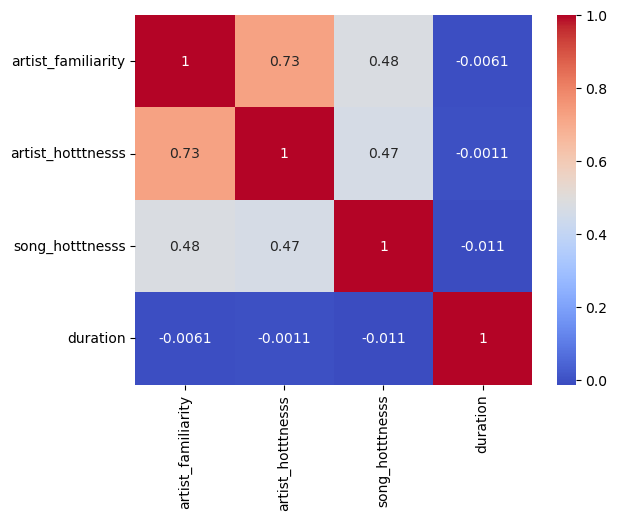

In [26]:
corr = song_data[['artist_familiarity', 'artist_hotttnesss', 'song_hotttnesss', 'duration']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()